# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [2]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

# Importing data

In [3]:
# Define the col names for the iris dataset
col_names = ["sepal length", "sepal width", "petal length", "petal width", "class"]

# Dataset url
iris_url = "~/escuela/semana_tec_analitica/TC1002S/NotebooksStudents/A01642759/iris/iris.data"

# Load the dataset from HHDD
iris_df = pd.read_csv(iris_url,names=col_names)
iris_df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [4]:
iris_df.shape

(150, 5)

2. Drop rows with any missing values


In [5]:
iris_df.isna().sum()
# There are no missing values

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

3. Encoding the class label categorical column: from string to num


In [6]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
iris_df = iris_df.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

#Visualize the dataset
iris_df.head()

/tmp/ipykernel_28582/107475468.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris_df = iris_df.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now the label/category is numeric


4. Discard columns that won't be used


In [7]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

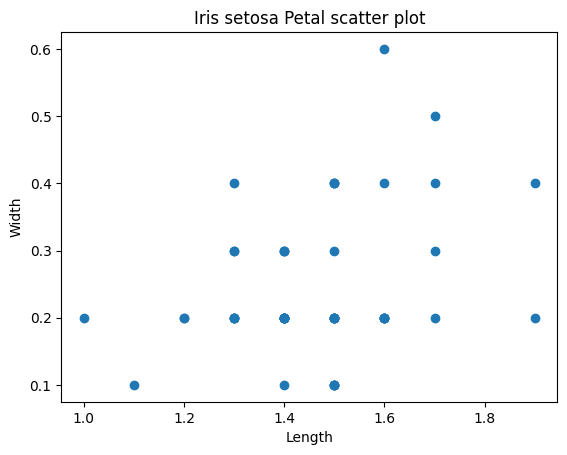

In [8]:
#Iris setosa
plt.scatter(iris_df[iris_df["class"]==0]["petal length"], iris_df[iris_df["class"]==0]["petal width"])

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris setosa Petal scatter plot')

# Show plot
plt.show()

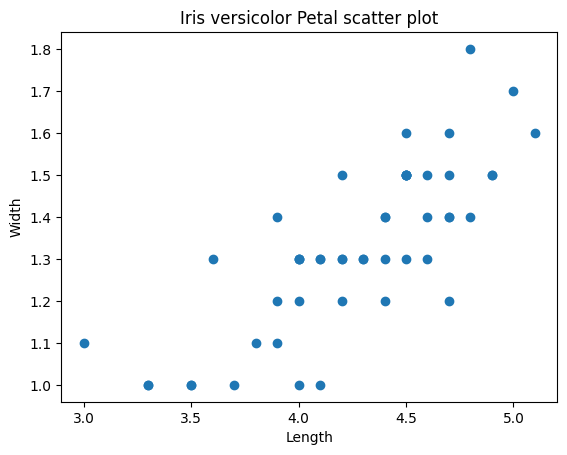

In [9]:
#Iris versicolor
plt.scatter(iris_df[iris_df["class"]==1]["petal length"], iris_df[iris_df["class"]==1]["petal width"])

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris versicolor Petal scatter plot')

# Show plot
plt.show()

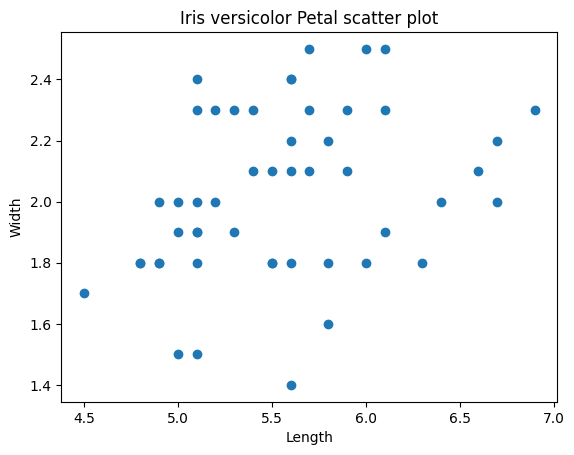

In [10]:
#Iris verginica
plt.scatter(iris_df[iris_df["class"]==2]["petal length"], iris_df[iris_df["class"]==2]["petal width"])

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris versicolor Petal scatter plot')

# Show plot
plt.show()

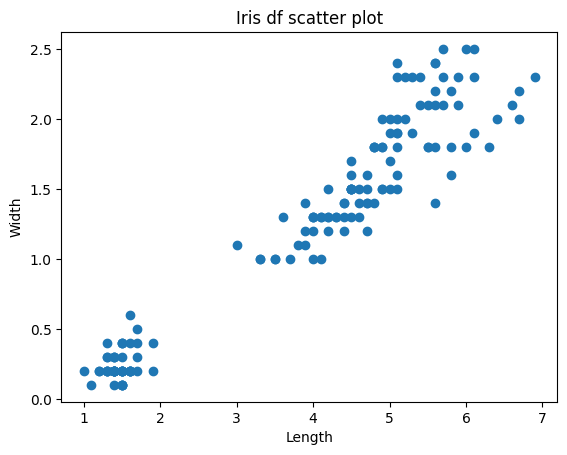

In [11]:
#Iris df 
plt.scatter(iris_df["petal length"], iris_df["petal width"])

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris df scatter plot')

# Show plot
plt.show()

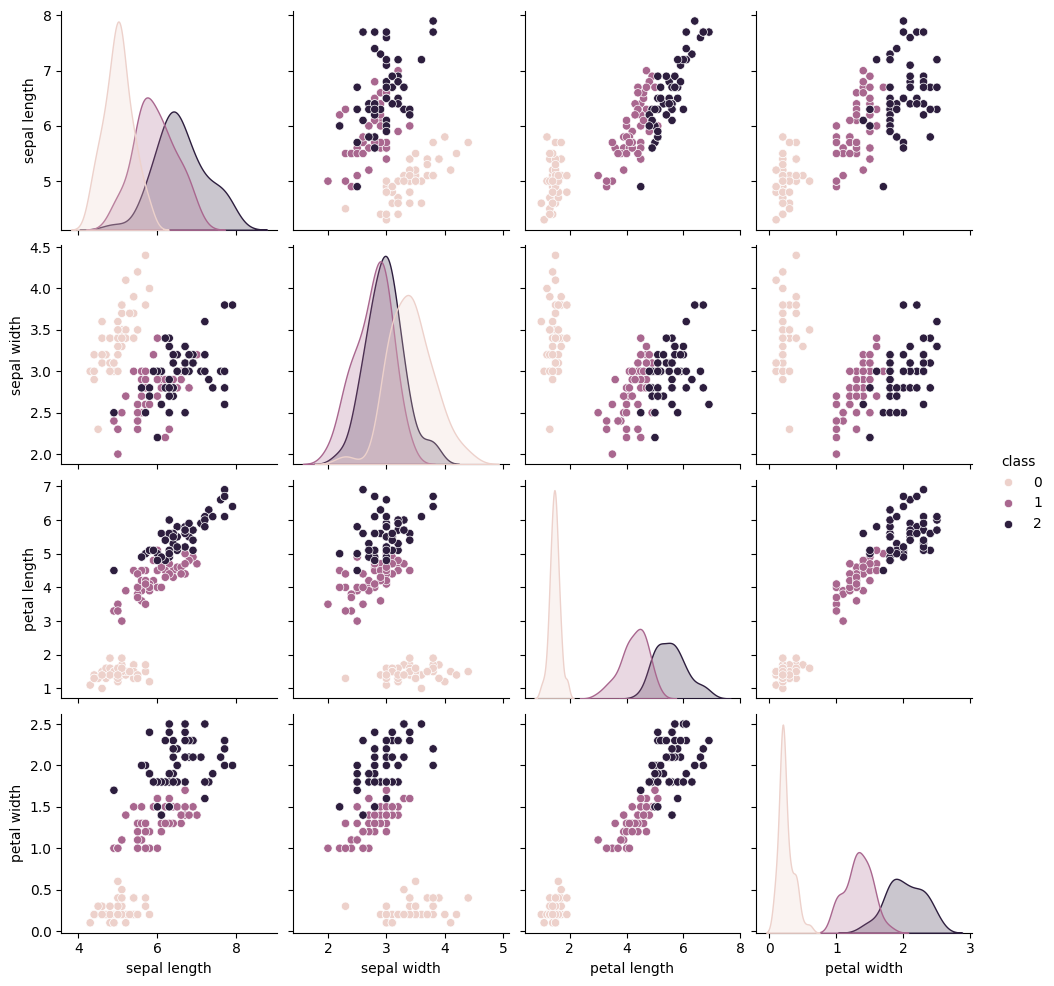

In [12]:
# Pairplot: Scatterplot of all variables
sns.pairplot(iris_df,hue="class")

# Show the plot
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

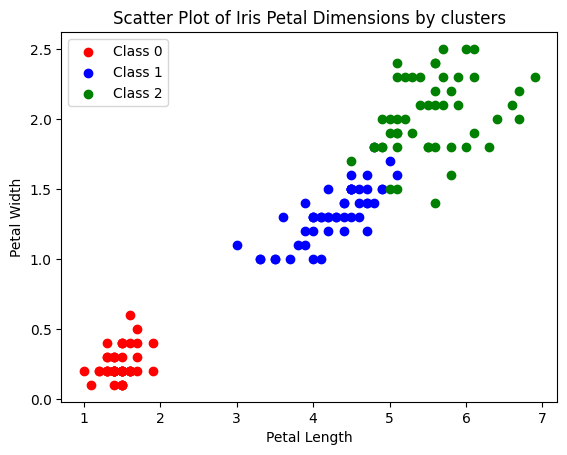

In [13]:
# Get dataframes for each real cluster
c0 = iris_df[iris_df["class"] == 0]
c1 = iris_df[iris_df["class"] == 1]
c2 = iris_df[iris_df["class"] == 2]
colors = {0: 'red', 1: 'blue', 2: 'green'}

# Create scatter plot for each cluster
plt.scatter(c0["petal length"], c0["petal width"], color='red', label='Class 0')
plt.scatter(c1["petal length"], c1["petal width"], color='blue', label='Class 1')
plt.scatter(c2["petal length"], c2["petal width"], color='green', label='Class 2')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.title('Scatter Plot of Iris Petal Dimensions by clusters')
plt.legend()
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [14]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
n_clusters = 3
# Print estimated cluster of each point in the dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(iris_df[["petal length","petal width", "sepal length", "sepal width"]])
labels = kmeans.predict(iris_df[["petal length","petal width", "sepal length", "sepal width"]])


In [15]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [16]:
# Este codigo fue generado por chatgpt. 
# OpenAI. (2024). Consulta sobre correspondencia entre etiquetas reales y estimadas en KMeans. ChatGPT.
# Manual pairing the labels of the real and estimated clusters
# Step 1: Create confusion matrix
conf_matrix = confusion_matrix(iris_df["class"], labels)

# Step 2: Use Hungarian algorithm to match clusters
row_ind, col_ind = linear_sum_assignment(-conf_matrix)

# Step 3: Create a dictionary mapping the KMeans labels to the original labels
label_mapping = {old_label: new_label for old_label, new_label in zip(col_ind, row_ind)}

# Step 4: Apply the mapping to the predicted labels
y_pred_mapped = np.array([label_mapping[label] for label in labels])

# Now you can evaluate or print the mapped labels
print("Original Predicted Labels: ", labels)
print("Mapped Predicted Labels: ", y_pred_mapped)

Original Predicted Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Mapped Predicted Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [17]:
# Add a new column to the dataset with the cluster information
iris_df["Kmeans_labels"] = y_pred_mapped
iris_df.tail(10)

,sepal length,sepal width,petal length,petal width,class,Kmeans_labels
140,6.7,3.1,5.6,2.4,2,2
141,6.9,3.1,5.1,2.3,2,2
142,5.8,2.7,5.1,1.9,2,1
143,6.8,3.2,5.9,2.3,2,2
144,6.7,3.3,5.7,2.5,2,2
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
149,5.9,3.0,5.1,1.8,2,1


In [18]:
# Label of the estimated clusters
print(y_pred_mapped)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [19]:
# Cluster centroides
kmeans.cluster_centers_


array([[5.71538462, 2.05384615, 6.85384615, 3.07692308],
       [1.464     , 0.244     , 5.006     , 3.418     ],
       [4.38852459, 1.43442623, 5.88360656, 2.74098361]])

In [20]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print(f"Sum of Squared Errors (SSE): {sse}")

Sum of Squared Errors (SSE): 78.9450658259773


In [21]:
# The number of iterations required to converge
iterations = kmeans.n_iter_
print(f"Number of iterations to converge: {iterations}")

Number of iterations to converge: 12


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

As we have 4 column-criteria, it's difficult to plot the centroids of the clusters. However, there are some reduction algorithms to try to plot the clusters and centroids. Here are some of them:

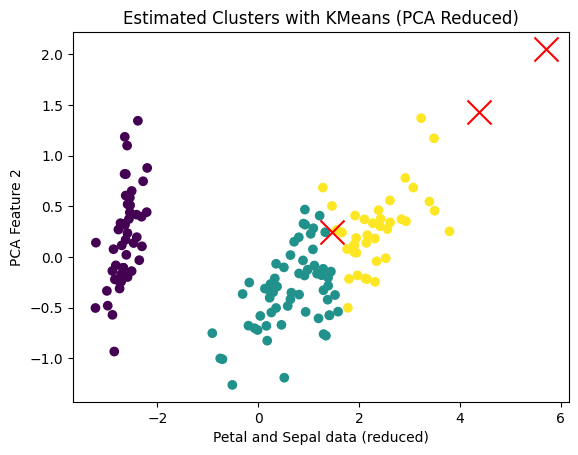

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(iris_df[["petal length","petal width", "sepal length", "sepal width"]])

# Plotting
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_mapped, cmap='viridis', marker='o')  # Plot data points colored by cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')  # Plot centroids
plt.title("Estimated Clusters with KMeans (PCA Reduced)")
plt.xlabel("Petal and Sepal data (reduced)")
plt.ylabel("PCA Feature 2")
plt.show()

/home/sebastian_pulido/.local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


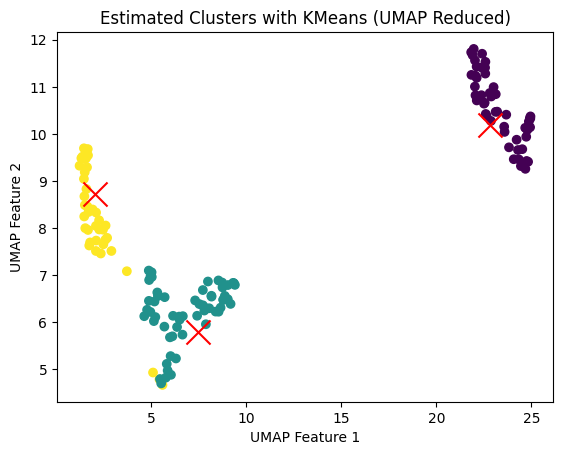

In [25]:
import umap
umap_reducer = umap.UMAP(n_components=2, random_state=0)
X_umap = umap_reducer.fit_transform(iris_df[["petal length","petal width", "sepal length", "sepal width"]])

# Plotting
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred_mapped, cmap='viridis', marker='o')  # Plot data points colored by cluster
plt.scatter(umap_reducer.transform(kmeans.cluster_centers_)[:, 0], 
            umap_reducer.transform(kmeans.cluster_centers_)[:, 1], 
            s=300, c='red', marker='x')  # Plot centroids
plt.title("Estimated Clusters with KMeans (UMAP Reduced)")
plt.xlabel("UMAP Feature 1")
plt.ylabel("UMAP Feature 2")
plt.show()

## Plot both real and estimated clusters to check for errors

Text(0, 0.5, 'PCA Component 2')

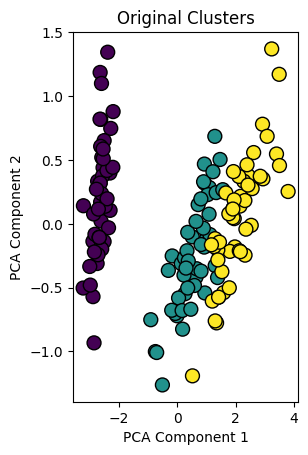

In [26]:
# real clusters
plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=iris_df["class"], cmap='viridis', edgecolor='k', s=100)
plt.title('Original Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')


Text(0, 0.5, 'PCA Component 2')

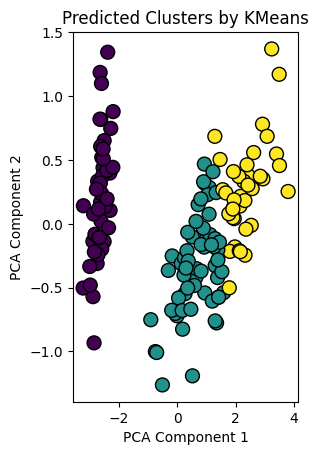

In [27]:
plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=iris_df["Kmeans_labels"], cmap='viridis', edgecolor='k', s=100)
plt.title('Predicted Clusters by KMeans')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [32]:
# Intialize a list to hold sum of squared error (sse)
sse_k = []
# Define values of k
k = [x for x in range(1,21)]

# For each k
for i in k:
    kmeans_k = KMeans(n_clusters=i, random_state=42)
    kmeans_k.fit(iris_df[["petal length","petal width", "sepal length", "sepal width"]])
    sse = kmeans_k.inertia_
    sse_k.append(sse)
print(sse_k)

[680.8244000000001, 152.36870647733906, 78.9450658259773, 57.44028021295475, 46.535582051282056, 39.251830892636775, 35.042759952465836, 30.217021122152705, 28.7564561965812, 28.42489180264181, 27.19303986699575, 25.497888139638142, 24.08023220896751, 23.482477272727273, 22.10570920745921, 21.34561324786325, 19.549946581196586, 17.427674603174605, 16.519482295482298, 15.368760073260077]


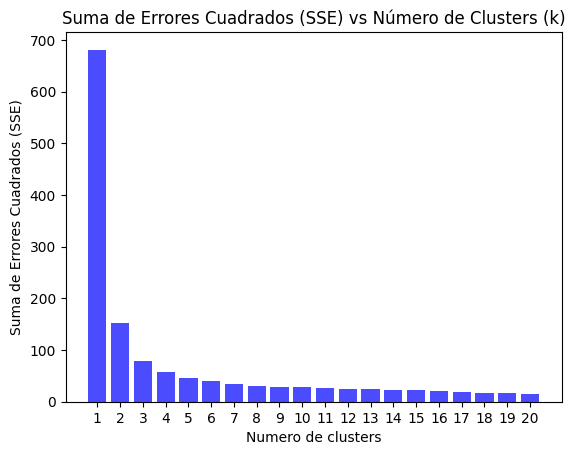

In [33]:
# Plot sse versus k
plt.bar(k, sse_k, color='blue', alpha=0.7)

# Añadir títulos y etiquetas
plt.title('Suma de Errores Cuadrados (SSE) vs Número de Clusters (k)')
plt.xlabel('Numero de clusters')
plt.ylabel('Suma de Errores Cuadrados (SSE)')

# Mostrar la gráfica
plt.xticks(k)  # Asegurarte de que todos los valores de k se muestren en el eje x
plt.show()

Choose the k after which the sse is minimally reduced


A partir de 8 clusters, la suma del error cuadrado se reduce minimamente

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k